<a href="https://colab.research.google.com/github/sarathkumar1304/Breast-cancer-prediction/blob/main/customer_segmentation_using_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# **1.Insights of the data**

In [ ]:
df=pd.read_excel("/content/cust_data.xlsx")
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [ ]:
df.shape

(30000, 38)

# **2.Data Preprocessing**

**Checking Null values**

In [ ]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

**Handling Null values**

In [ ]:
df['Gender'].isnull().sum()

2724

In [ ]:
# This .mode fun will be queit helpful for filling the NAN values in the catogerical column
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df.isnull().sum().sum()

0

In [ ]:
df['Gender'].value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

**Dropping the Unwanted column**

In [ ]:
df.drop(columns = ['Cust_ID'], inplace = True)
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,M,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,F,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,M,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,F,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,F,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Encoding the object values**

In [ ]:
# Here i am just mapping instead of using the ordinal encoder 
df["Gender"] = df['Gender'].map({'M':1, 'F':2})
df.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,10,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# **3.Data visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


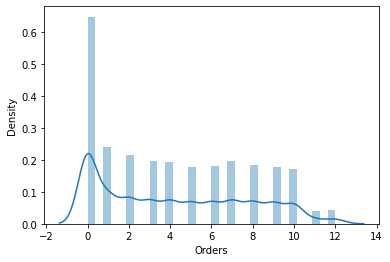

In [ ]:
sns.distplot(df['Orders'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


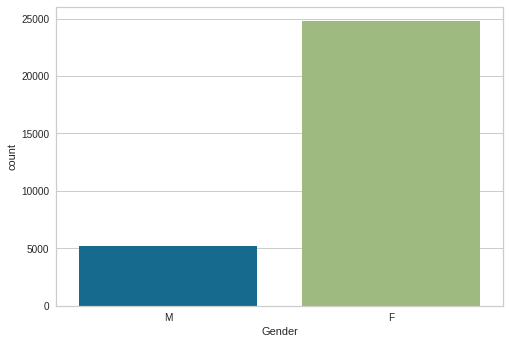

In [ ]:
sns.countplot(df.Gender,label='count')

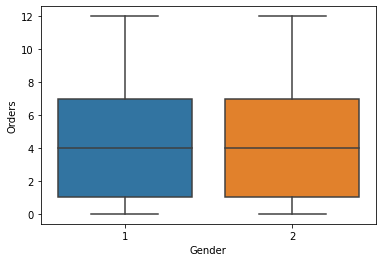

In [ ]:
sns.boxplot( x="Gender", y='Orders', data=df)

Here we can see that there are no Outliers

# **4.Finding the optimal number of clusters using different methods**

**Method 1 : Elbow Method**

In [ ]:
inertia = []
for i in range(1,10):
  model = KMeans(i)
  model.fit(df)
  wcss=model.inertia_     # Within-Cluster-Sum of Squared Errors(WCSS)
  inertia.append(wcss)
print(inertia)

[922806.4653666681, 620898.7650530579, 572554.5446585161, 547370.3587444717, 527578.5702363302, 511495.71160959, 496825.6010268759, 484501.50602313527, 476735.26536840765]


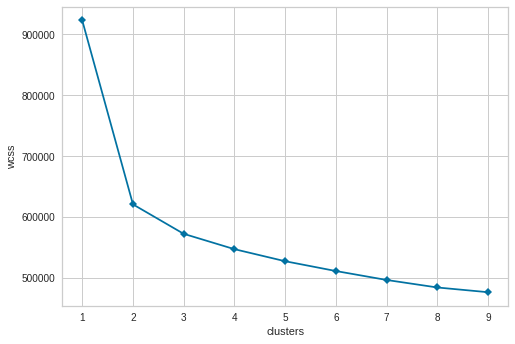

In [ ]:
clusters=range(1,10)
plt.plot(clusters, inertia, marker="D",ms=5)
plt.xlabel("clusters")
plt.ylabel("wcss")
plt.show()

**Method 2: silhouette score**

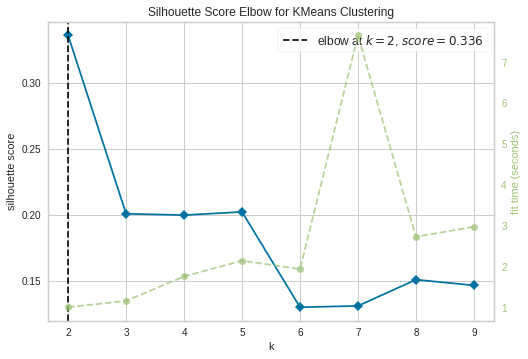

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Method 3: Dendogram**

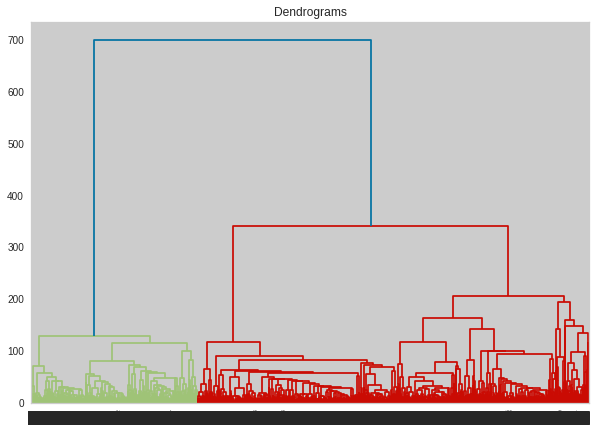

In [ ]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df, method='ward'))

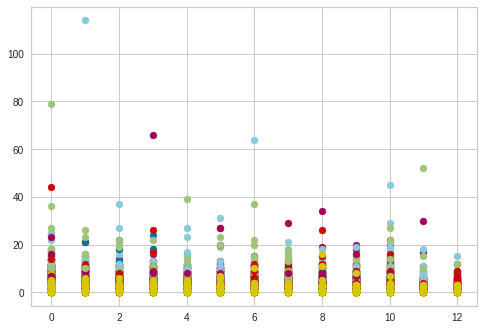

In [ ]:
l = df.columns
for i in l[2:]:
  plt.scatter(df['Orders'], df[i], cmap="copper")
plt.show()

By all the three methods we can clearly see that n_cluster = 2 has the optimal value...  
But i am going to take **n_cluster = 3**....because of the Dendogram

# **5.Training the dataset**

In [ ]:
df1 = df.iloc[:,2:]
df1.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
model = KMeans(3)
cluster = model.fit_predict(df1)  

In [ ]:
df1['cluster'] = cluster
df1.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


Text(0.5, 1.0, 'Size of clusters')

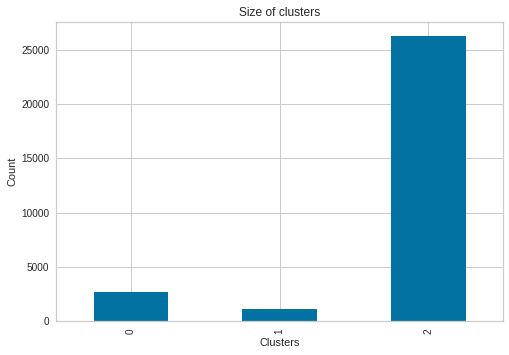

In [ ]:
df1.cluster.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.title('Size of clusters')

**cluster center**

the cluster center gives informaion about the the variables belonging to the clusters

In [ ]:
model.cluster_centers_

array([[0.57369615, 0.52078609, 0.41609977, 0.28042328, 0.24603175,
        0.26152683, 0.212774  , 0.23998488, 0.16213152, 0.37377173,
        0.88737717, 1.35260771, 0.3446712 , 0.28382464, 0.66817838,
        1.42441421, 0.17157974, 2.51927438, 0.8851096 , 0.65986395,
        0.43764172, 0.13643235, 0.03401361, 2.46560847, 0.28647014,
        0.45124717, 0.68291761, 0.66591081, 0.51662887, 0.17573696,
        0.14814815, 0.58465608, 0.27626606, 0.30876795, 0.34429327],
       [0.28609865, 0.28609865, 0.2206278 , 0.19461883, 0.16860987,
        0.1632287 , 0.11748879, 0.11838565, 0.09596413, 0.16681614,
        0.37309417, 0.18923767, 0.15336323, 0.14887892, 0.10044843,
        0.33991031, 0.03946188, 0.87085202, 0.29506726, 4.86098655,
        1.18295964, 0.81973094, 0.18565022, 0.42690583, 0.15964126,
        0.10852018, 0.26457399, 0.39641256, 0.20269058, 0.05470852,
        0.04304933, 0.40807175, 0.27264574, 0.11928251, 0.07174888],
       [0.23575594, 0.22382713, 0.20355196, 0.

In [ ]:
cluster_center=pd.DataFrame(model.cluster_centers_,columns=df1.columns[:35])
cluster_center

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0.573696,0.520786,0.416100,0.280423,0.246032,0.261527,0.212774,0.239985,0.162132,0.373772,...,0.451247,0.682918,0.665911,0.516629,0.175737,0.148148,0.584656,0.276266,0.308768,0.344293
1,0.286099,0.286099,0.220628,0.194619,0.168610,0.163229,0.117489,0.118386,0.095964,0.166816,...,0.108520,0.264574,0.396413,0.202691,0.054709,0.043049,0.408072,0.272646,0.119283,0.071749
2,0.235756,0.223827,0.203552,0.147910,0.132132,0.126491,0.095812,0.098174,0.087351,0.115439,...,0.067114,0.229887,0.339114,0.121041,0.068753,0.048782,0.143451,0.093601,0.064446,0.043294


**Cluster 0**

In [ ]:
sorted(zip(list(cluster_center.iloc[0,:]),list(cluster_center.columns)),reverse=True)

[(2.5192743764172367, 'J.M. Smucker'),
 (2.4656084656084896, 'Burberry'),
 (1.4244142101284658, 'Asics'),
 (1.3526077097505949, 'Dairy Queen'),
 (0.8873771730914519, 'H&M'),
 (0.8851095993953242, 'Pop Chips'),
 (0.68291761148904, 'Dior'),
 (0.6681783824640989, 'Pladis'),
 (0.6659108087679462, 'Scabal'),
 (0.6598639455782314, 'Juniper'),
 (0.5846560846560775, 'Colavita'),
 (0.5736961451247181, 'Jordan'),
 (0.520786092214659, 'Gatorade'),
 (0.5166288737717266, 'Tommy Hilfiger'),
 (0.45124716553288524, 'LG'),
 (0.437641723356006, 'Huawei'),
 (0.41609977324262837, 'Samsung'),
 (0.3737717309145919, 'Brooks'),
 (0.3446712018140585, 'Fendi'),
 (0.3442932728647056, 'Kraft'),
 (0.30876795162509846, 'Jiffy mix'),
 (0.28647014361300244, 'Mi'),
 (0.2838246409674963, 'Hewlett Packard'),
 (0.2804232804232779, 'Asus'),
 (0.27626606198034964, 'Microsoft'),
 (0.26152683295540086, 'Mondelez International'),
 (0.24603174603174716, 'Udis'),
 (0.23998488284202413, 'Vans'),
 (0.21277399848828593, 'Wrangler'

**cluster 1**

In [ ]:
sorted(zip(list(cluster_center.iloc[1,:]),list(cluster_center.columns)),reverse=True)

[(4.860986547085224, 'Juniper'),
 (1.182959641255609, 'Huawei'),
 (0.8708520179372193, 'J.M. Smucker'),
 (0.81973094170404, 'Compaq'),
 (0.4269058295964136, 'Burberry'),
 (0.40807174887892395, 'Colavita'),
 (0.39641255605381176, 'Scabal'),
 (0.3730941704035874, 'H&M'),
 (0.3399103139013454, 'Asics'),
 (0.2950672645739908, 'Pop Chips'),
 (0.2860986547085204, 'Gatorade'),
 (0.2860986547085203, 'Jordan'),
 (0.27264573991031515, 'Microsoft'),
 (0.26457399103139023, 'Dior'),
 (0.2206278026905827, 'Samsung'),
 (0.20269058295964132, 'Tommy Hilfiger'),
 (0.19461883408071878, 'Asus'),
 (0.18923766816143495, 'Dairy Queen'),
 (0.18565022421524693, 'IBM'),
 (0.1686098654708521, 'Udis'),
 (0.166816143497758, 'Brooks'),
 (0.16322869955156957, 'Mondelez International'),
 (0.15964125560538098, 'Mi'),
 (0.15336322869955182, 'Fendi'),
 (0.14887892376681588, 'Hewlett Packard'),
 (0.11928251121076225, 'Jiffy mix'),
 (0.11838565022421522, 'Vans'),
 (0.1174887892376679, 'Wrangler'),
 (0.1085201793721972, 'L

**cluster 3**

In [ ]:
sorted(zip(list(cluster_center.iloc[2,:]),list(cluster_center.columns)),reverse=True)

[(0.5719349060558729, 'J.M. Smucker'),
 (0.33911353329015226, 'Scabal'),
 (0.2699035786424675, 'H&M'),
 (0.2652158999962113, 'Juniper'),
 (0.2357559358207298, 'Jordan'),
 (0.22988680971074404, 'Dior'),
 (0.22382712755820855, 'Gatorade'),
 (0.2226075688860397, 'Burberry'),
 (0.20355196463279324, 'Samsung'),
 (0.20057929036929356, 'Huawei'),
 (0.1851823621326753, 'Asics'),
 (0.1816380197416138, 'Pop Chips'),
 (0.1492434925111462, 'Hewlett Packard'),
 (0.1479096002134171, 'Asus'),
 (0.14345058881817105, 'Colavita'),
 (0.13213155989176686, 'Udis'),
 (0.12649110103280922, 'Mondelez International'),
 (0.12104119821638731, 'Tommy Hilfiger'),
 (0.12046953008880075, 'Fendi'),
 (0.11543885056595615, 'Brooks'),
 (0.10305270780136586, 'Mi'),
 (0.09817447311254016, 'Vans'),
 (0.09581157818513976, 'Wrangler'),
 (0.09489690918101443, 'Dairy Queen'),
 (0.09360112809177015, 'Microsoft'),
 (0.08735088989671666, 'Fila'),
 (0.08719844506269646, 'Compaq'),
 (0.06875262014557987, 'Hollister'),
 (0.067113838

# **6.Conclusion**

With the help of three different methods we were taken the no of clusters as 3
*   Elbow
*   Silhouette score
*   Dendogram  
Note : **one method is enough to decide the no of clusters**  
With n_cluster = 3   
I have trained the model and find the 3 clusters (cluster_0, cluster_1, cluster_2)  
Among those clusters, More than 85% of the customers are comes under cluster_2 category.  
By analysing the cluster column and its values..I am naming the clusters  
* cluster_0 --> Foods and Snacks   
* cluster_1 --> IT's and Electronics   
* cluster_2 --> Fashion and Lifestyle  
Finally,   
We can say **customers have huge interest towards the Fashion and Lifestyle**.

The funny thing.... I feel like customers have huge interest towards the Fashion and Lifestyle Because of the dataset is biased on Female...&#x1F600;